#  Predicting Online Purchase Intent Based on User Behavior

## Manu Emmanueal
## Entri Elevate

## Dataset
The dataset for this analysis is publicly available on the UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

### Objective
The objective of this project is to identify key user behaviour features that influence purchase decisions

### Loading necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer

In [9]:
data = pd.read_csv("online_shoppers_intention.csv")

In [11]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [13]:
df = pd.DataFrame(data)

### Initial Data Inspection

In [16]:
print("Initial Data Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

Initial Data Shape: (12330, 18)
Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
Data Types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [18]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Checking For Duplicates and Removing Them

In [21]:
duplicate = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate)
df = df.drop_duplicates()
print("Shape After Removing Duplicates:", df.shape)

Number of Duplicate Rows: 125
Shape After Removing Duplicates: (12205, 18)


### Checking Target Variable Distribution

In [24]:
print("\nTarget Variable ('Revenue') Distribution:")
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True))


Target Variable ('Revenue') Distribution:
Revenue
False    10297
True      1908
Name: count, dtype: int64
Revenue
False    0.843671
True     0.156329
Name: proportion, dtype: float64


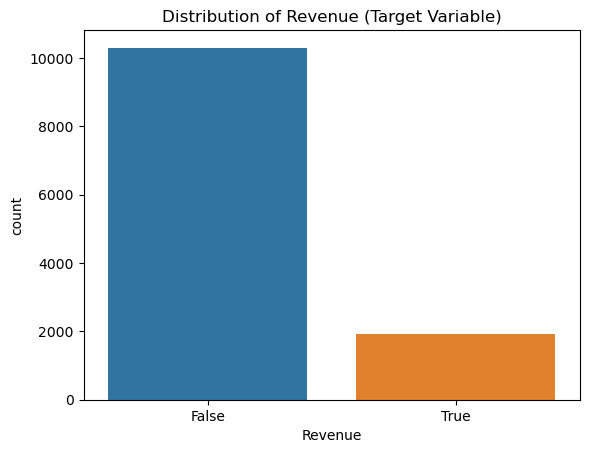

In [26]:
sns.countplot(data=df, x='Revenue')
plt.title('Distribution of Revenue (Target Variable)')
plt.show()

### Data Preprocessing and EDA

In [29]:
categorical_cols = ['Month', 'VisitorType', 'Weekend']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for Month:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

Value Counts for VisitorType:
VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

Value Counts for Weekend:
Weekend
False    9346
True     2859
Name: count, dtype: int64


In [31]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [33]:
numeric_features = df.select_dtypes(include = 'number')
numeric_features

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


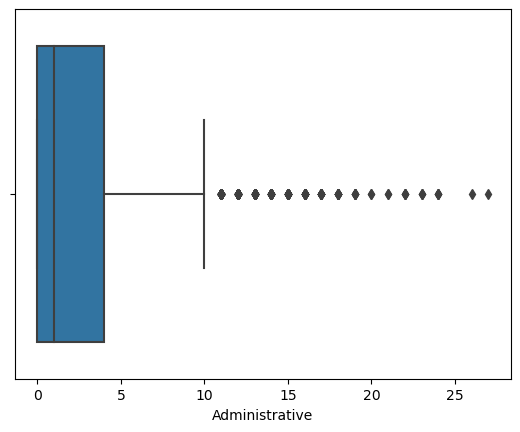

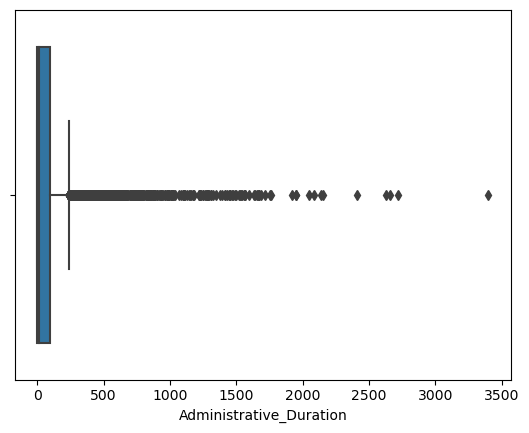

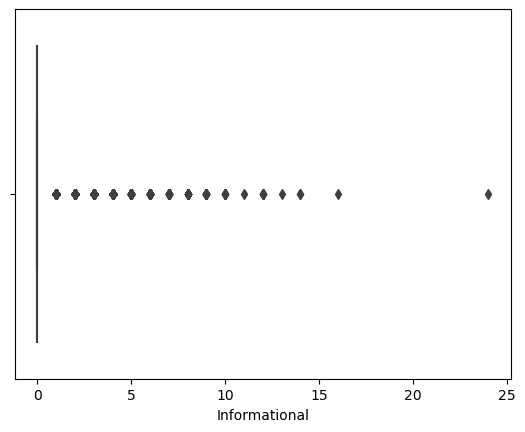

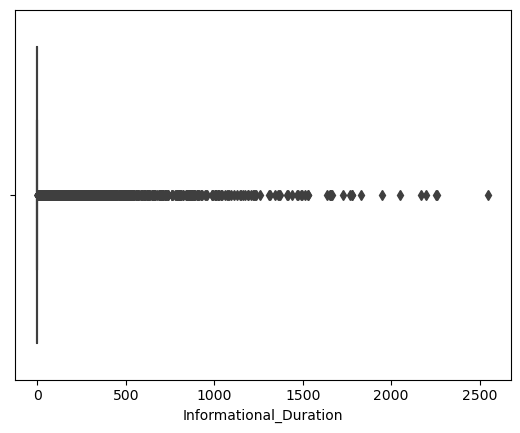

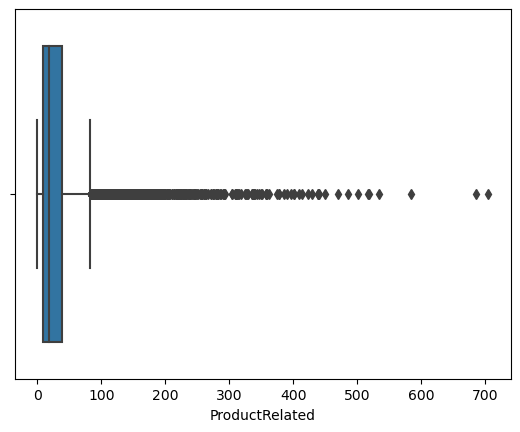

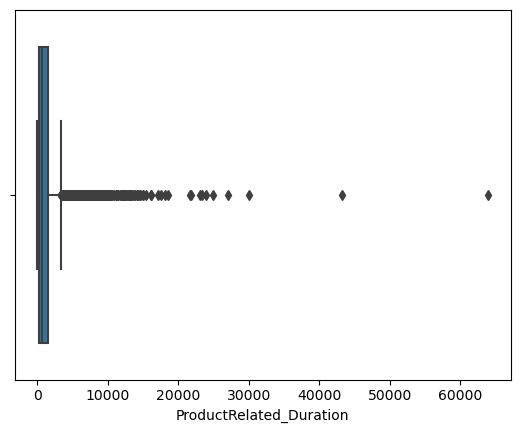

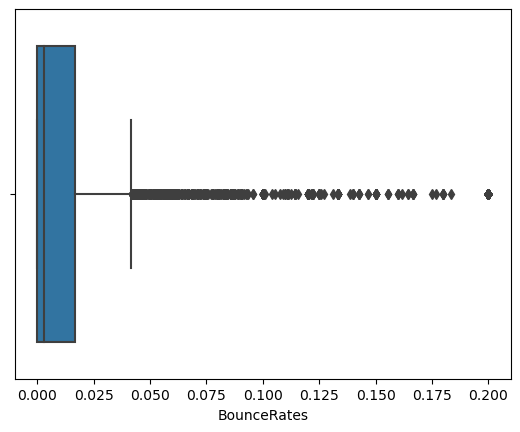

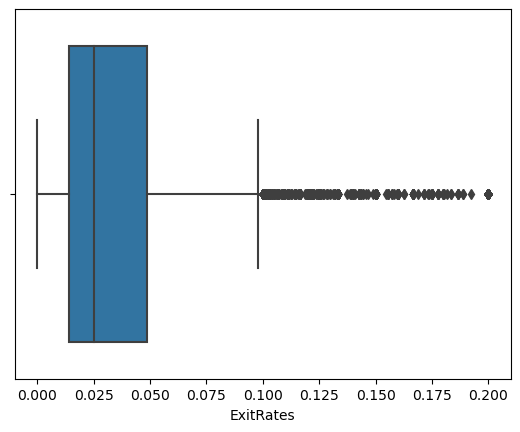

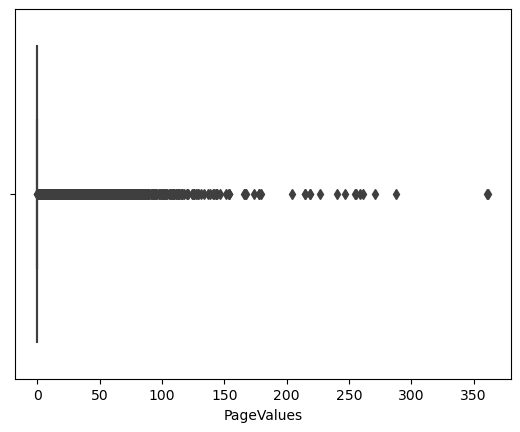

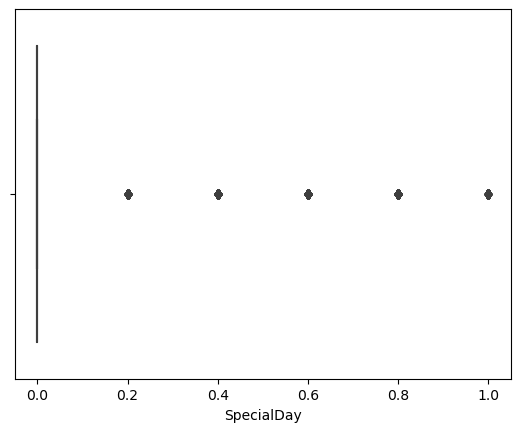

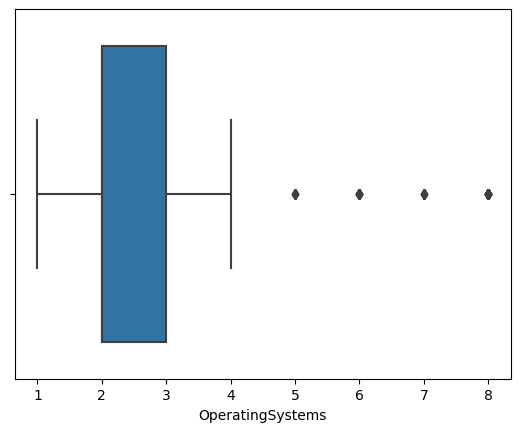

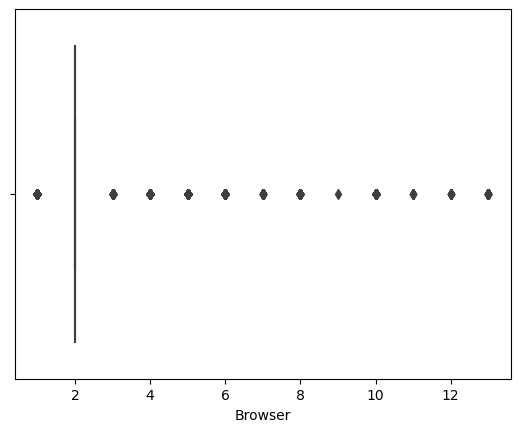

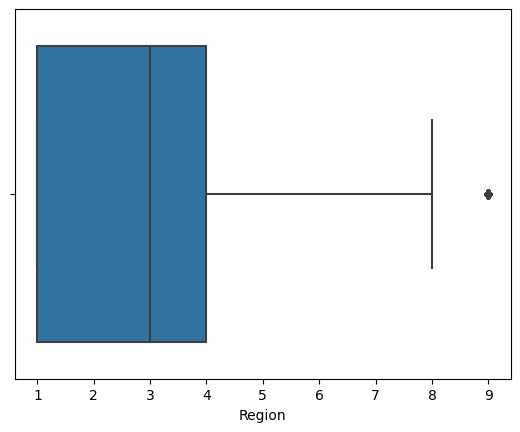

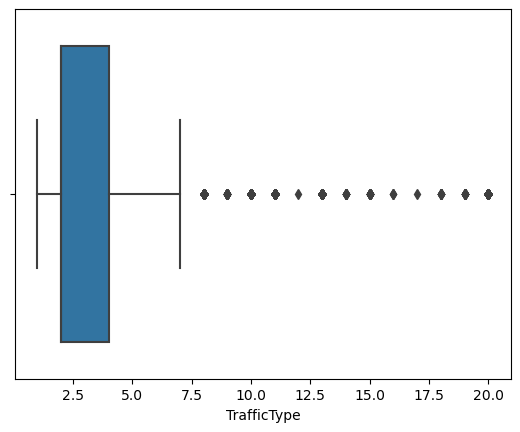

In [35]:
for i in numeric_features.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [37]:
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        #capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [42]:
df = outliers(df)

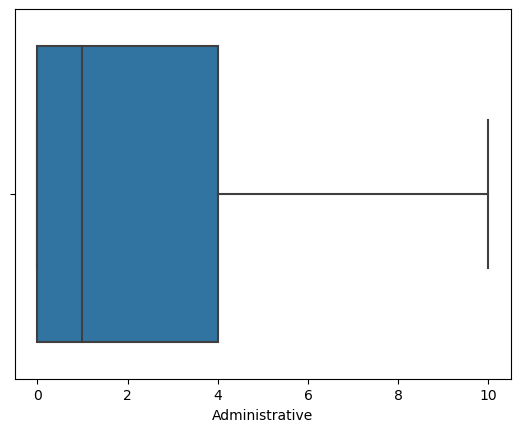

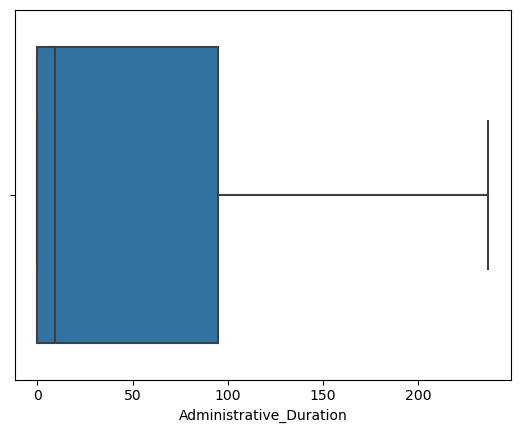

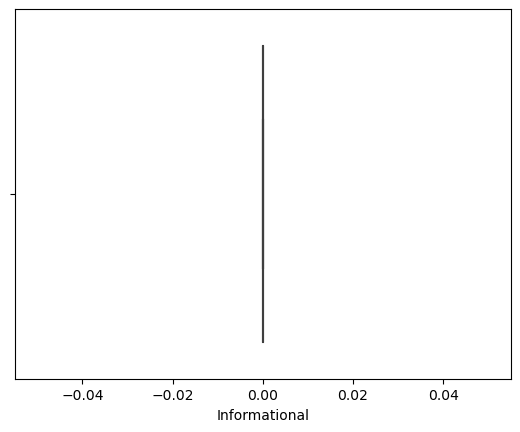

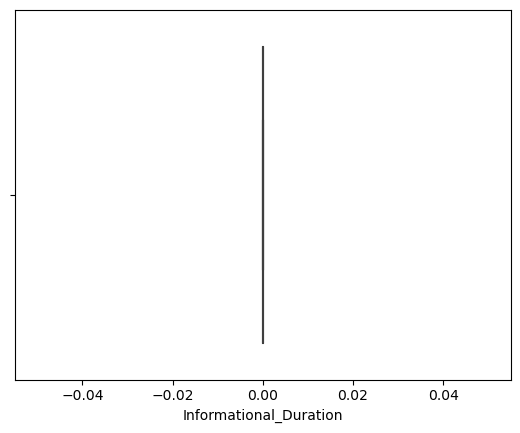

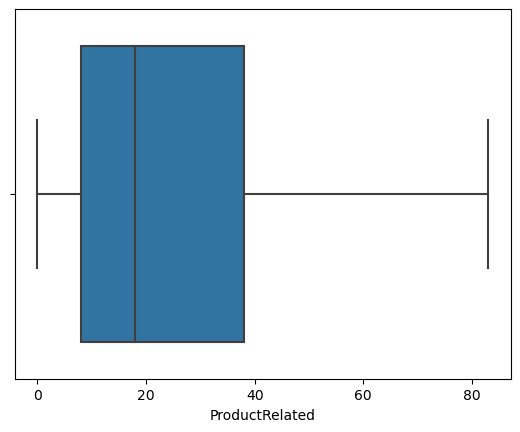

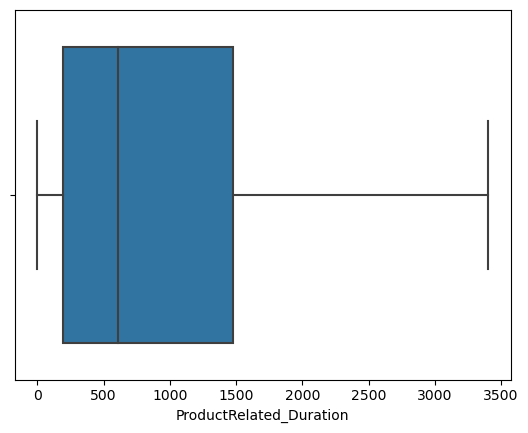

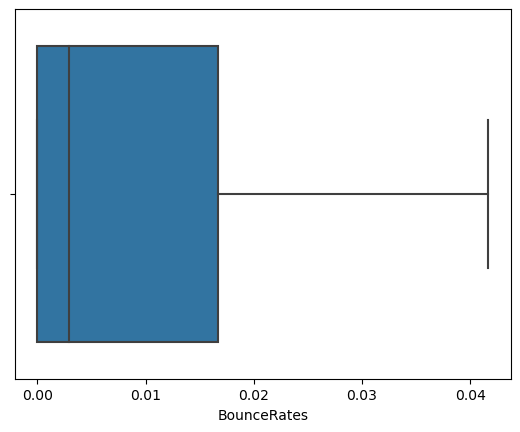

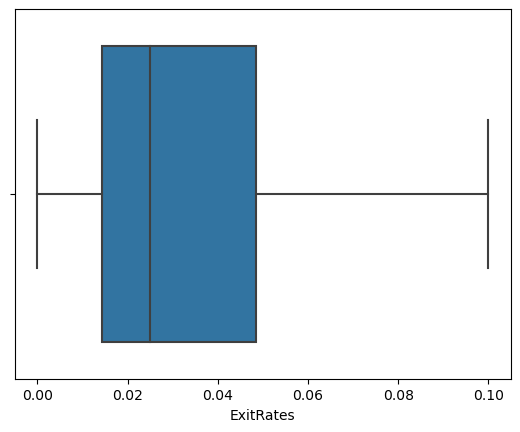

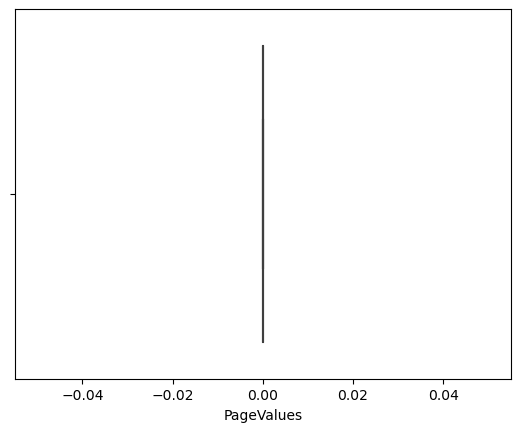

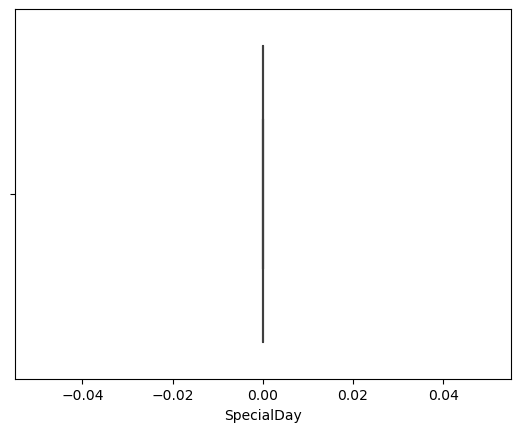

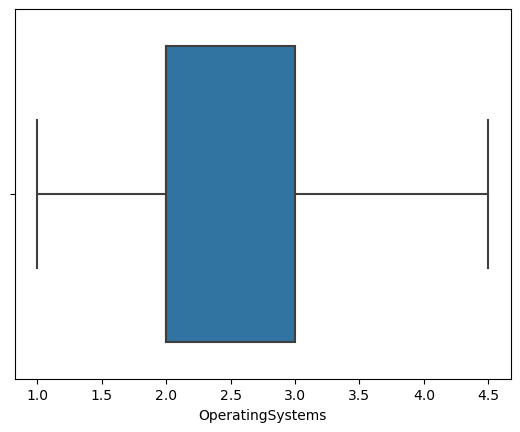

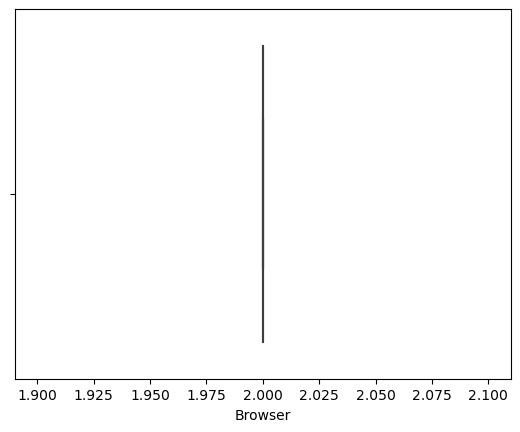

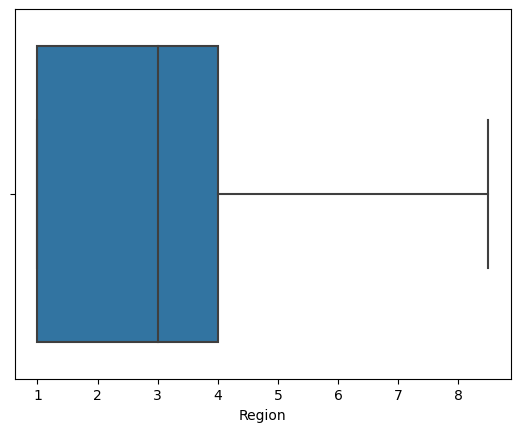

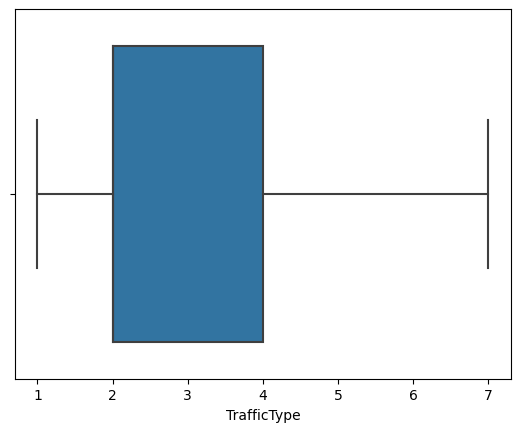

In [44]:
for i in numeric_features.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [46]:
l = LabelEncoder()

In [48]:
df['Revenue'] = l.fit_transform(df['Revenue'])

In [50]:
df['Weekend'] = df['Weekend'].astype(int)

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1.0,2.0,1.0,1.0,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4.0,2.0,8.5,3.0,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,2.0,1.0,4.0,Returning_Visitor,1,0


In [54]:
df1 = pd.get_dummies(df,columns=['Month', 'VisitorType'],drop_first=True,dtype=int)

In [56]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [58]:
X =df1.drop('Revenue', axis=1)
y=df1['Revenue']

In [60]:
X.skew()

Administrative                    1.303703
Administrative_Duration           1.234182
Informational                     0.000000
Informational_Duration            0.000000
ProductRelated                    1.102964
ProductRelated_Duration           1.156859
BounceRates                       1.234544
ExitRates                         1.119473
PageValues                        0.000000
SpecialDay                        0.000000
OperatingSystems                  0.545422
Browser                           0.000000
Region                            0.917717
TrafficType                       0.838796
Weekend                           1.255097
Month_Dec                         2.077911
Month_Feb                         8.028813
Month_Jul                         5.029436
Month_June                        6.313340
Month_Mar                         1.934566
Month_May                         1.020578
Month_Nov                         1.190194
Month_Oct                         4.391261
Month_Sep  

In [62]:
pt =PowerTransformer(method='yeo-johnson')

In [64]:
numerical_col = X.select_dtypes(include= 'number').columns

In [66]:
df1[numerical_col] = pt.fit_transform(df1[numerical_col])
print(df1[numerical_col].skew())

Administrative                    0.223886
Administrative_Duration           0.101334
Informational                     0.000000
Informational_Duration            0.000000
ProductRelated                   -0.046414
ProductRelated_Duration          -0.156336
BounceRates                       0.568852
ExitRates                         0.255073
PageValues                        0.000000
SpecialDay                        0.000000
OperatingSystems                 -0.005492
Browser                           0.000000
Region                            0.124389
TrafficType                       0.068316
Weekend                           1.255097
Month_Dec                         2.077911
Month_Feb                         8.028813
Month_Jul                         5.029436
Month_June                        6.313340
Month_Mar                         1.934566
Month_May                         1.020578
Month_Nov                         1.190194
Month_Oct                         4.391261
Month_Sep  

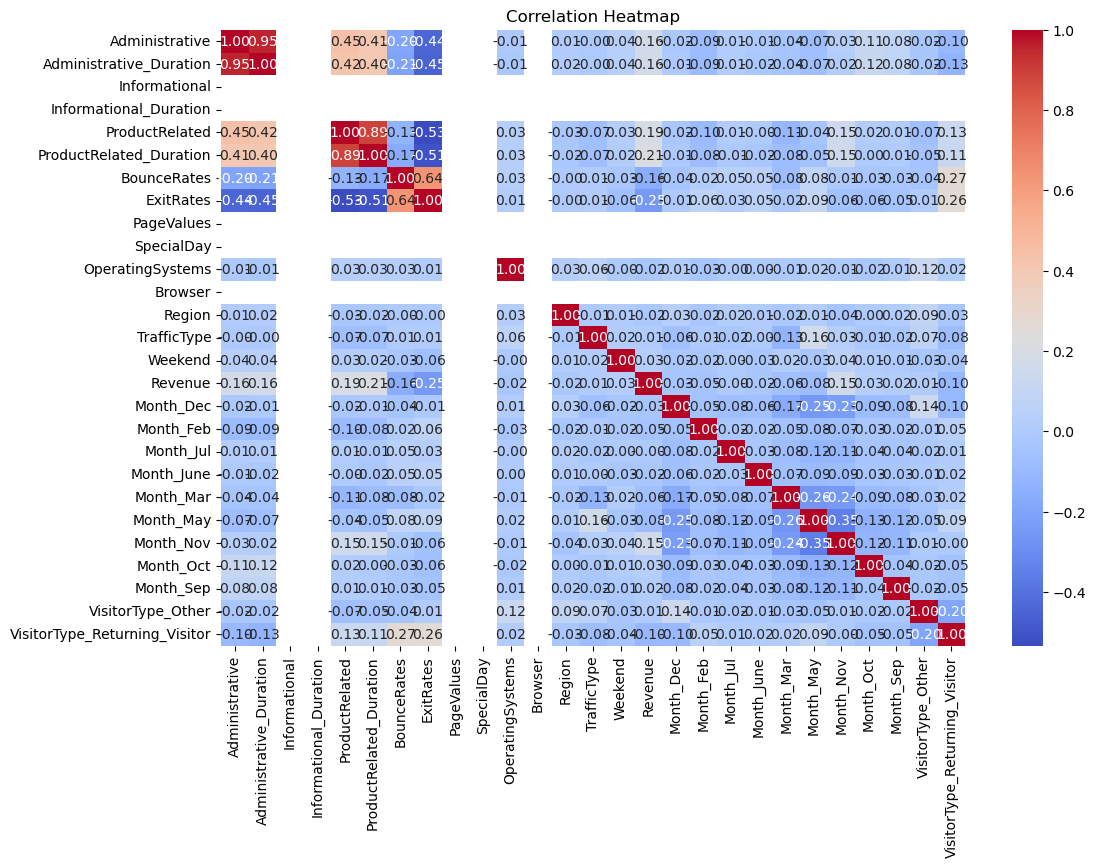

In [68]:
#Correlation Heatmp
plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


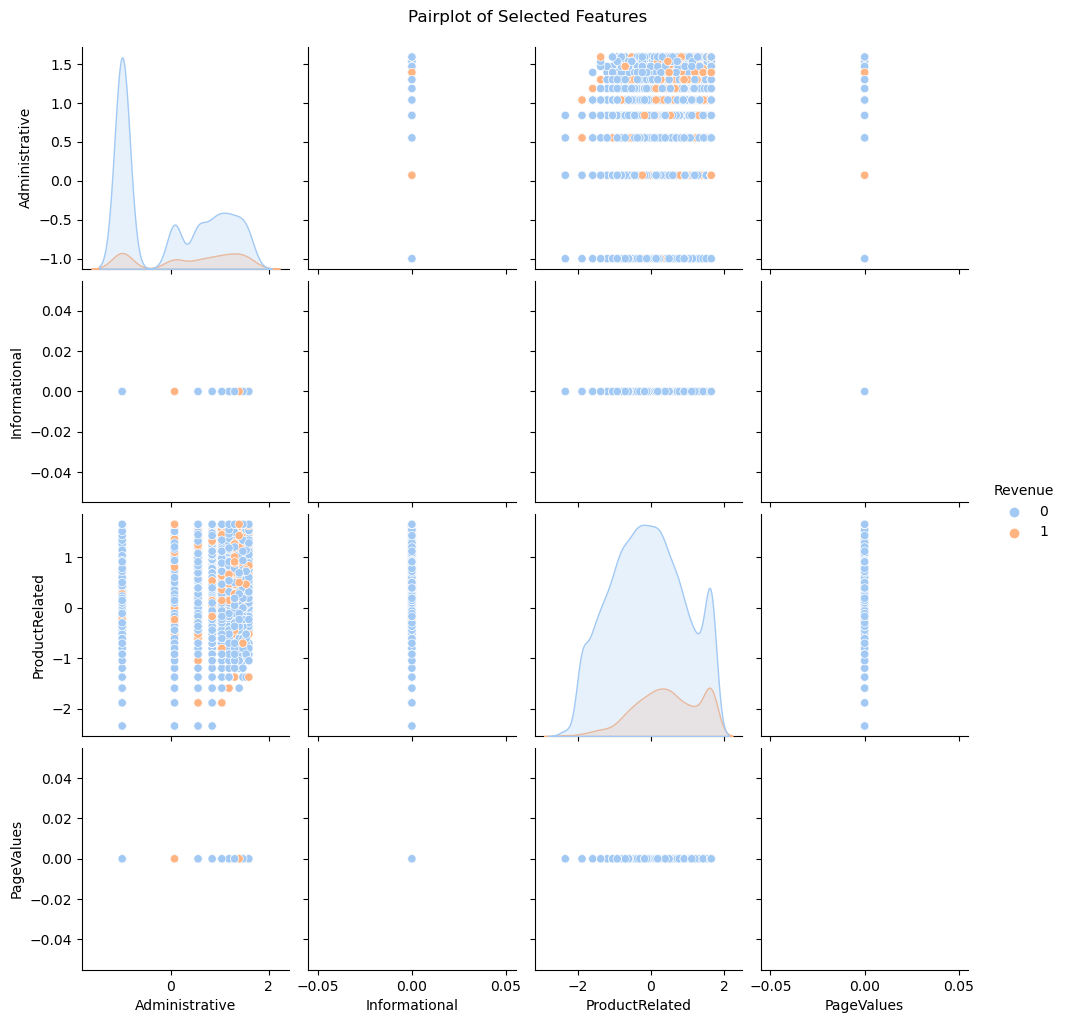

In [70]:
#Pairplot for Key Features
sns.pairplot(df1, vars=['Administrative', 'Informational', 'ProductRelated', 'PageValues'], hue='Revenue', palette='pastel')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

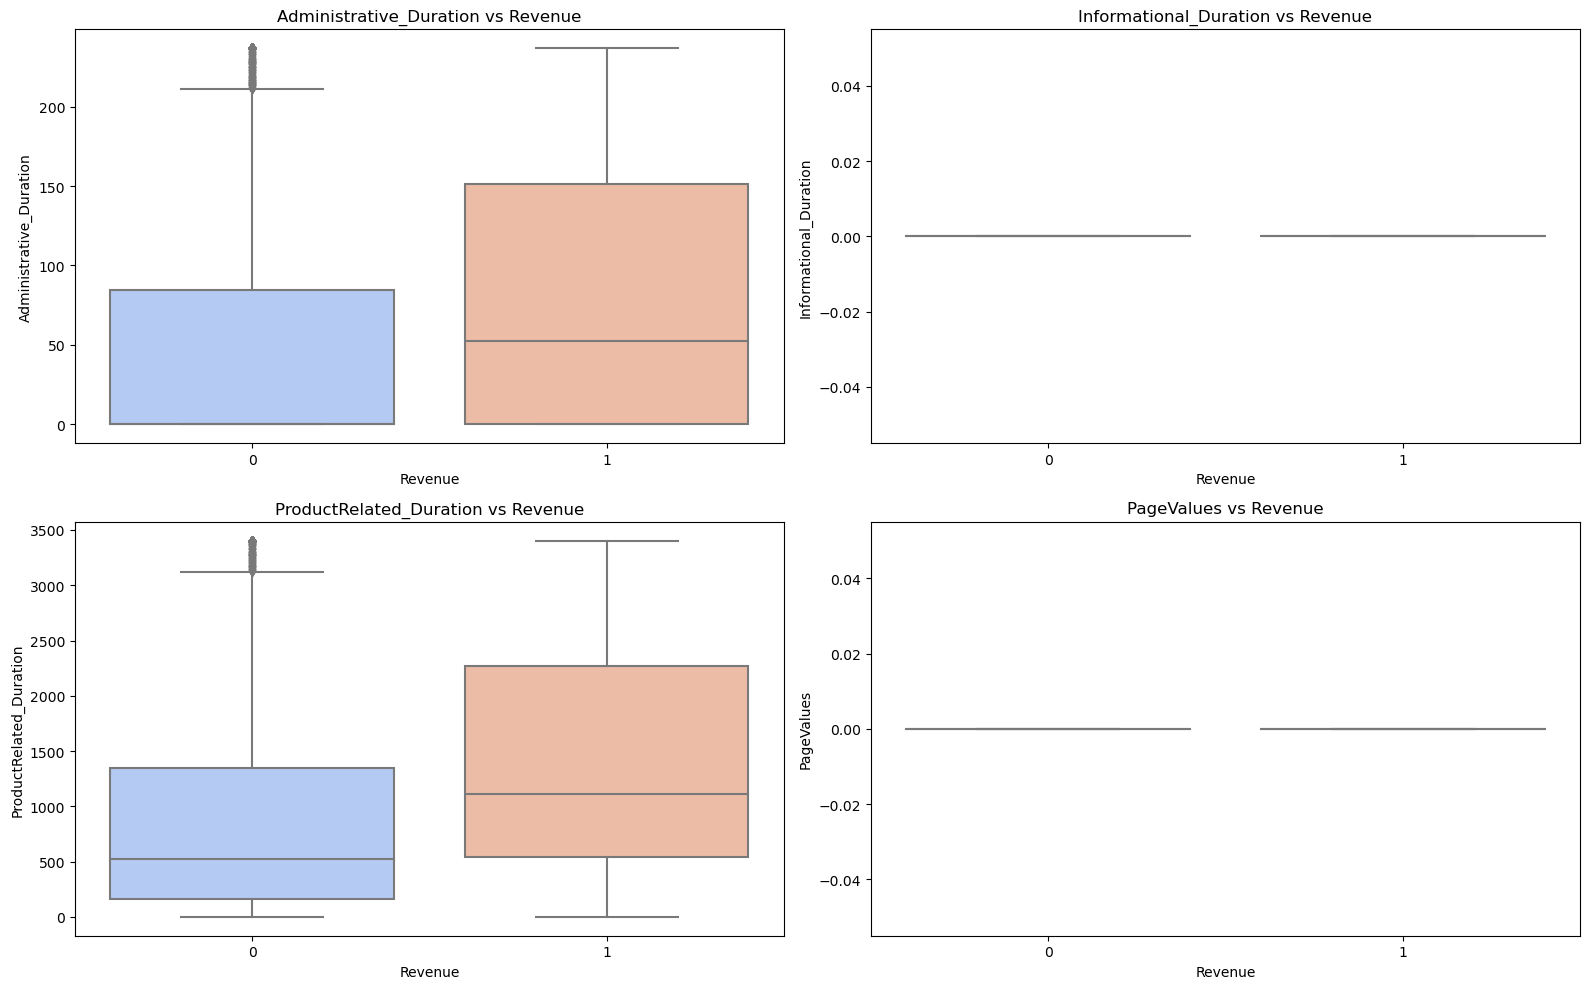

In [71]:
# Boxplots for Numeric Features vs Revenue
plt.figure(figsize=(16, 10))
numeric_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Revenue', y=feature, palette='coolwarm')
    plt.title(f'{feature} vs Revenue')
plt.tight_layout()
plt.show()

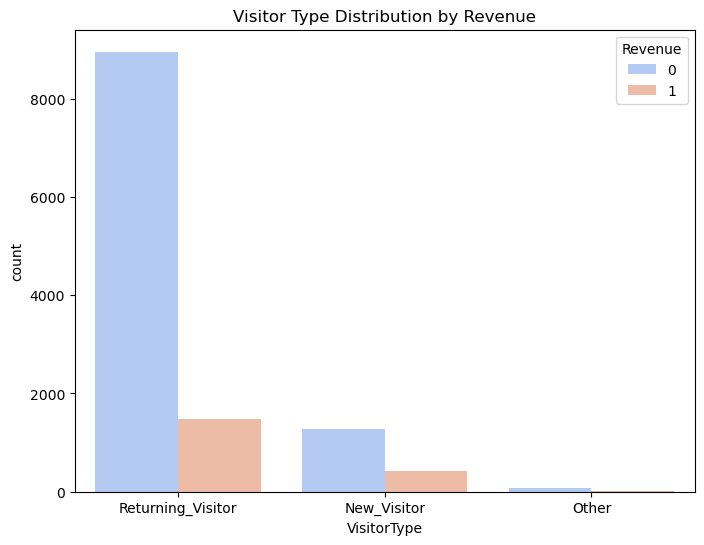

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='VisitorType', hue='Revenue', palette='coolwarm')
plt.title('Visitor Type Distribution by Revenue')
plt.show()

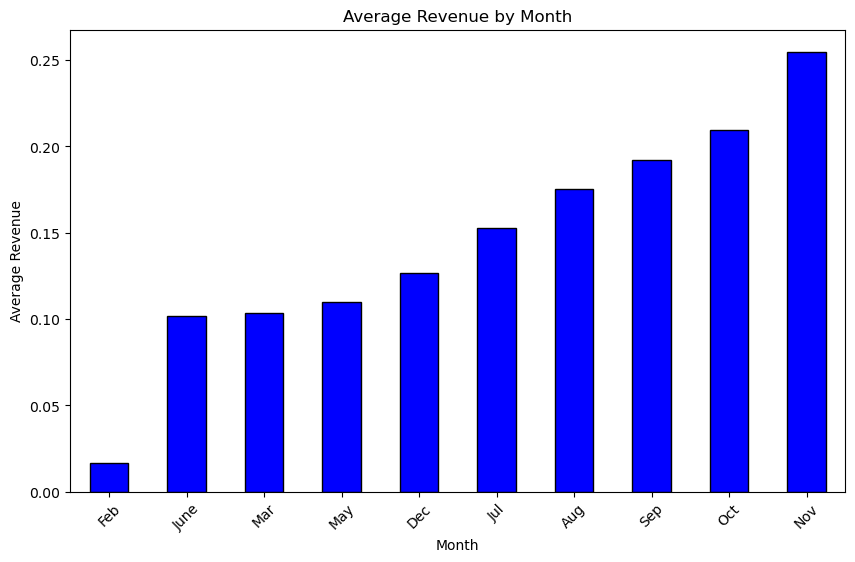

In [82]:
monthly_revenue = df.groupby('Month')['Revenue'].mean().sort_values()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Revenue by Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()